In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("../data/raw/train.csv")
print(df.shape)
df.head()

(16784, 30)


,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price
0,1030324,BMW 3 Series 320i Gran Turismo M-Sport,bmw,320i,1 owner! 320i gt m-sports model! big brake kit...,2013.0,NaN,09-dec-2013,luxury sedan,"parf car, premium ad car, low mileage car",...,73000.0,45330.0,50462.0,NaN,NaN,uncategorized,"5 doors gt, powerful and fuel efficient 2.0l t...","bmw i-drive, navigation, bluetooth/aux/usb inp...",NaN,71300.0
1,1021510,Toyota Hiace 3.0M,NaN,hiace,high loan available! low mileage unit. wear an...,2014.0,NaN,26-jan-2015,van,premium ad car,...,110112.0,27502.0,1376.0,NaN,25-jan-2035,uncategorized,low mileage unit. well maintained vehicle. vie...,factory radio setting. front recording camera....,NaN,43800.0
2,1026909,Mercedes-Benz CLA-Class CLA180,mercedes-benz,cla180,1 owner c&c unit. full agent service with 1 mo...,2016.0,NaN,25-jul-2016,luxury sedan,"parf car, premium ad car",...,80000.0,27886.0,26041.0,NaN,NaN,uncategorized,responsive and fuel efficient 1.6l inline 4 cy...,dual electric/memory seats. factory fitted aud...,NaN,95500.0
3,1019371,Mercedes-Benz E-Class E180 Avantgarde,mercedes-benz,e180,"fully agent maintained, 3 years warranty 10 ye...",2019.0,NaN,17-nov-2020,luxury sedan,"parf car, almost new car, consignment car",...,9800.0,46412.0,56977.0,NaN,NaN,uncategorized,"1.5l inline-4 twin scroll turbocharged engine,...",64 colour ambient lighting. active parking ass...,NaN,197900.0
4,1031014,Honda Civic 1.6A VTi,NaN,civic,"kah motor unit! 1 owner, lowest 1.98% for full...",2019.0,NaN,20-sep-2019,mid-sized sedan,parf car,...,40000.0,20072.0,20101.0,NaN,NaN,uncategorized,"1.6l i-vtec engine, 123 bhp, earth dreams cvt ...","s/rims, premium leather seats, factory touch s...",NaN,103200.0


# Target

In [3]:
target = "price"

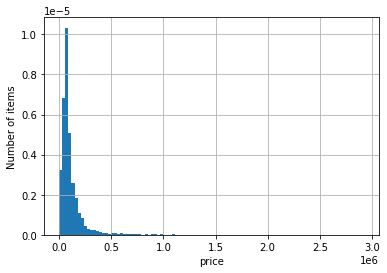

In [4]:
df[target].hist(bins=100, density=True)
plt.ylabel('Number of items')
plt.xlabel(target)
plt.show()

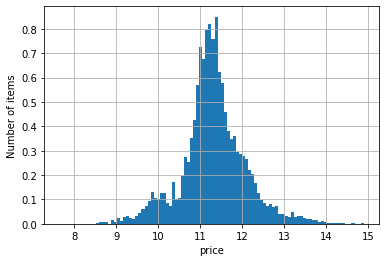

In [5]:
np.log(df[target]).hist(bins=100, density=True)
plt.ylabel('Number of items')
plt.xlabel(target)
plt.show()

# Variable Types

In [6]:
cat_vars = [var for var in df.columns if df[var].dtype == 'O']
cat_vars = cat_vars + ['listing_id']
print (f"length of categorical variables: {len(cat_vars)}")
print (f"categorical variable names: {cat_vars}")
# "original_reg_date", "reg_date", "lifespan" are misclassified, they should belong to date


length of categorical variables: 16
categorical variable names: ['title', 'make', 'model', 'description', 'original_reg_date', 'reg_date', 'type_of_vehicle', 'category', 'transmission', 'fuel_type', 'opc_scheme', 'lifespan', 'eco_category', 'features', 'accessories', 'listing_id']


In [7]:
time_vars = ["original_reg_date", "reg_date", "lifespan", 'manufactured']
for i in time_vars:
    if i in cat_vars:
        cat_vars.remove(i)

In [8]:
df[cat_vars] = df[cat_vars].astype('O')

In [9]:
num_vars = [
    var for var in df.columns if var not in cat_vars+time_vars and var != target
]

print (f"length of numerical variables: {len(num_vars)}")
print (f"numerical variable names: {num_vars}")

length of numerical variables: 12
numerical variable names: ['curb_weight', 'power', 'engine_cap', 'no_of_owners', 'depreciation', 'coe', 'road_tax', 'dereg_value', 'mileage', 'omv', 'arf', 'indicative_price']


# Missing Values

In [10]:
# variables with high percentage of NA can be dropped
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]
df[vars_with_na].isnull().mean().sort_values(ascending=False)

indicative_price     1.000000
opc_scheme           0.987667
original_reg_date    0.981053
lifespan             0.898594
fuel_type            0.792064
mileage              0.221878
accessories          0.167600
power                0.139240
make                 0.128694
road_tax             0.128337
dereg_value          0.070841
coe                  0.053086
curb_weight          0.034497
features             0.027347
depreciation         0.025798
description          0.020555
arf                  0.016921
reg_date             0.011976
manufactured         0.011559
no_of_owners         0.010486
engine_cap           0.003158
omv                  0.002443
dtype: float64

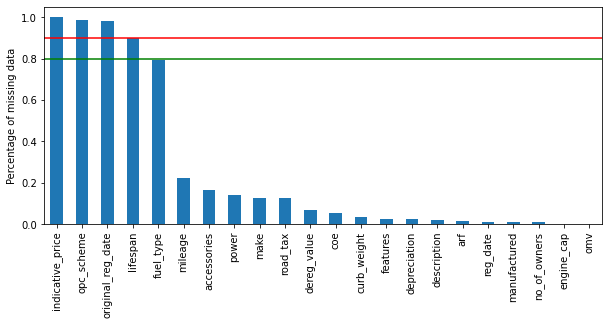

In [11]:
df[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

In [12]:
cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]
time_na = [var for var in time_vars if var in vars_with_na]

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))
print('Number of time variables with na: ', len(time_na))

Number of categorical variables with na:  6
Number of numerical variables with na:  12
Number of time variables with na:  4


In [13]:
def analyse_na_value(df, var):
    df = df.copy()

    # let's make an interim variable that indicates 1 if the
    # observation was missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)
    tmp = df.groupby(var)[target].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title=target, color='green')


/Users/user/.pyenv/versions/anaconda3-5.2.0/envs/py37/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


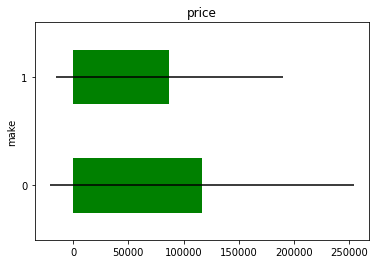

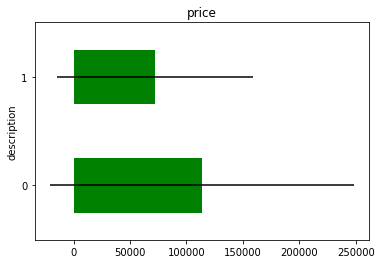

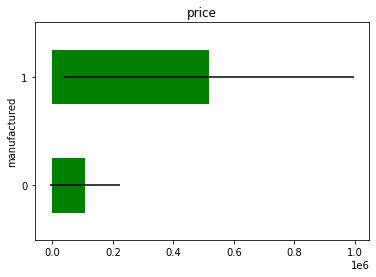

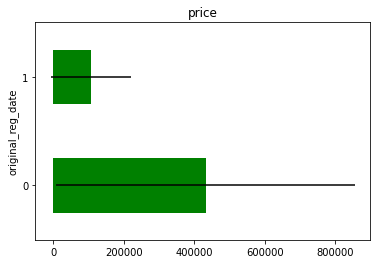

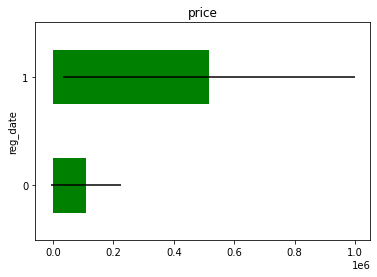

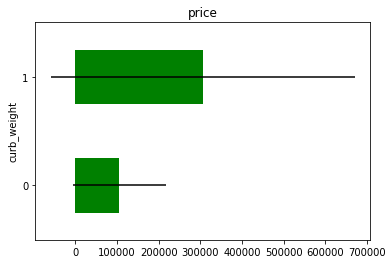

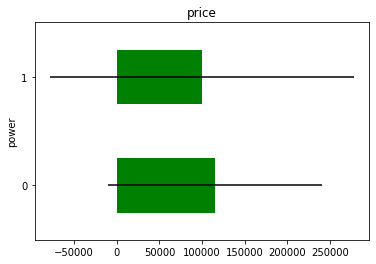

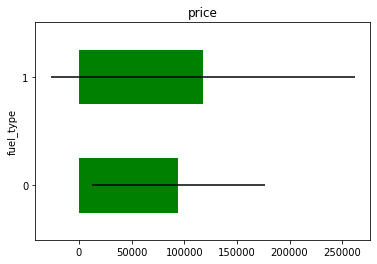

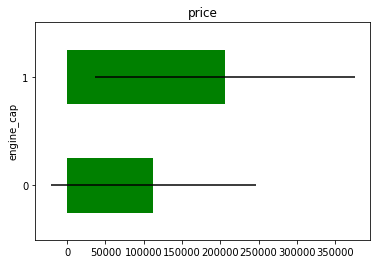

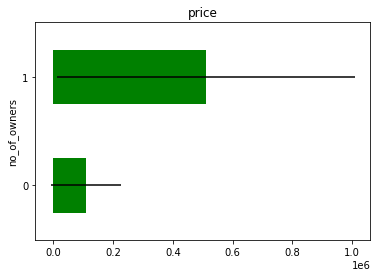

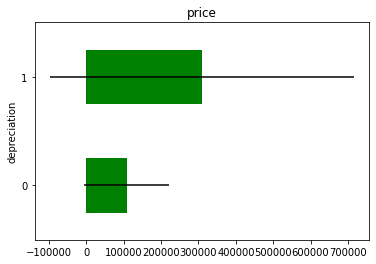

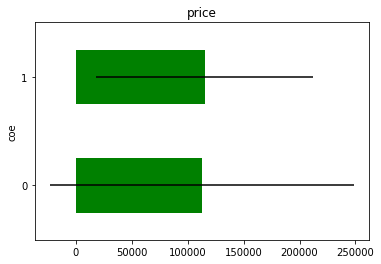

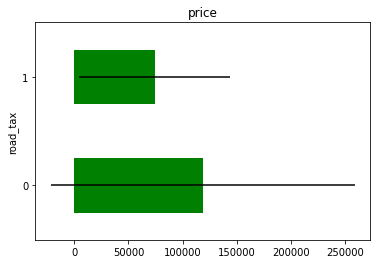

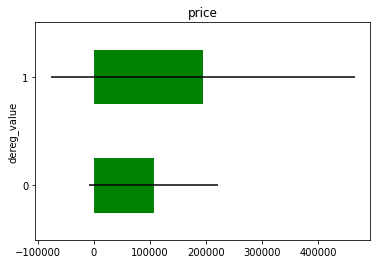

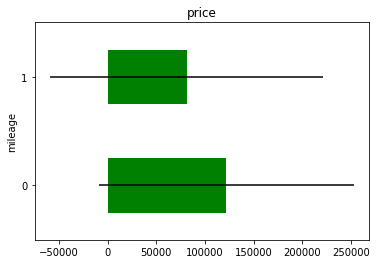

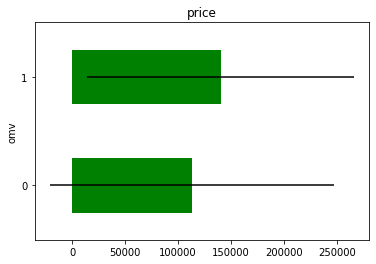

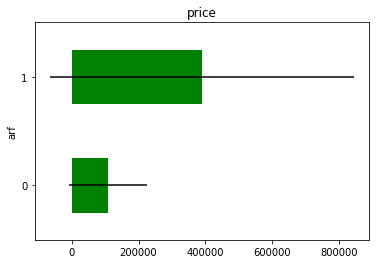

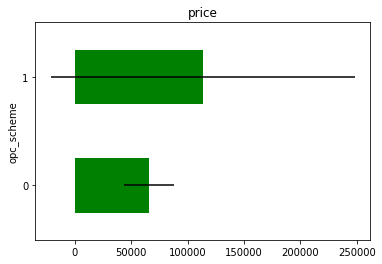

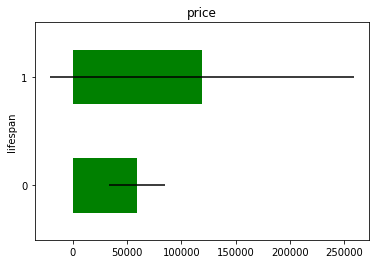

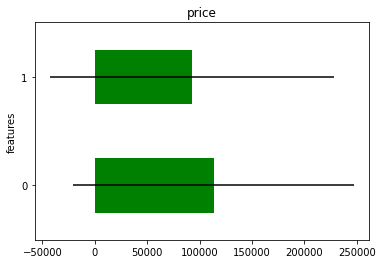

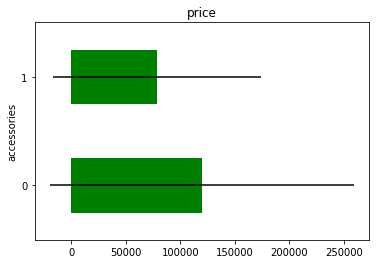

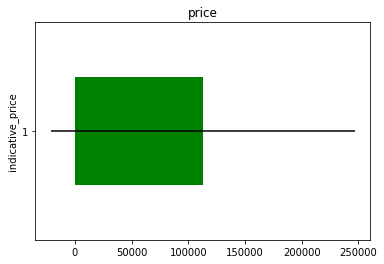

In [14]:
for var in vars_with_na:
    analyse_na_value(df, var)

# Numerical variables

In [15]:
print('Number of numerical variables: ', len(num_vars))
df[num_vars].head()

Number of numerical variables:  12


,curb_weight,power,engine_cap,no_of_owners,depreciation,coe,road_tax,dereg_value,mileage,omv,arf,indicative_price
0,1560.0,135.0,1997.0,1.0,17700.0,77100.0,1210.0,47514.0,73000.0,45330.0,50462.0,NaN
1,1740.0,NaN,2982.0,3.0,11630.0,10660.0,NaN,3648.0,110112.0,27502.0,1376.0,NaN
2,1430.0,90.0,1595.0,1.0,15070.0,53694.0,740.0,44517.0,80000.0,27886.0,26041.0,NaN
3,1635.0,115.0,1497.0,1.0,16400.0,40690.0,684.0,80301.0,9800.0,46412.0,56977.0,NaN
4,1237.0,92.0,1597.0,1.0,10450.0,26667.0,742.0,36453.0,40000.0,20072.0,20101.0,NaN


# Temporal variables 

In [16]:
# "original_reg_date" & "lifespan" has high level of NA values
for var in time_vars:
    df[var] = pd.to_datetime(df[var])

In [17]:
df["reg_date_year"] = df["reg_date"].dt.year
time_vars.append("reg_date_year")

Text(0, 0.5, 'Median & Mean Price')

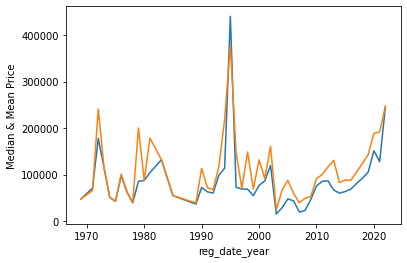

In [18]:
df.groupby('reg_date_year')[target].median().plot()
df.groupby('reg_date_year')[target].mean().plot()
plt.ylabel('Median & Mean Price')

Text(0, 0.5, 'Count transactions')

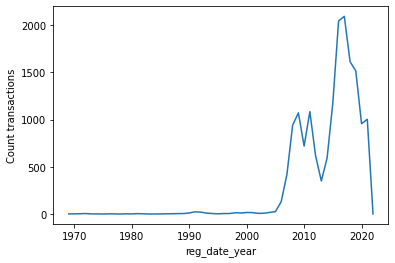

In [19]:
df.groupby('reg_date_year')["listing_id"].count().plot()
plt.ylabel('Count transactions')

# Discrete Variables

In [20]:
("No. of unique value")
for var in num_vars:
    print (f"{var}: {len(df[var].unique())}")

curb_weight: 796
power: 302
engine_cap: 333
no_of_owners: 7
depreciation: 2894
coe: 2103
road_tax: 543
dereg_value: 12333
mileage: 4642
omv: 10654
arf: 10447
indicative_price: 1


In [21]:
discrete_vars = [var for var in num_vars if len(df[var].unique()) < 20]
df[discrete_vars].head()

,no_of_owners,indicative_price
0,1.0,NaN
1,3.0,NaN
2,1.0,NaN
3,1.0,NaN
4,1.0,NaN


In [22]:
# remove indicative_price as it only contains NA
discrete_vars.remove("indicative_price")

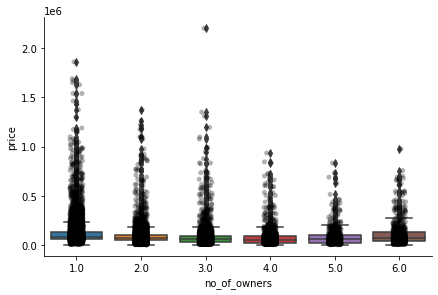

In [23]:
# no clear correlation, doesn't appear to be a strong variable
for var in discrete_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y=target, data=df, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y=target, data=df, jitter=0.1, alpha=0.3, color='k')
    plt.show()

# Continuous variables

In [61]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars+time_vars]
cont_vars.remove("indicative_price")
print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  10


<AxesSubplot:>

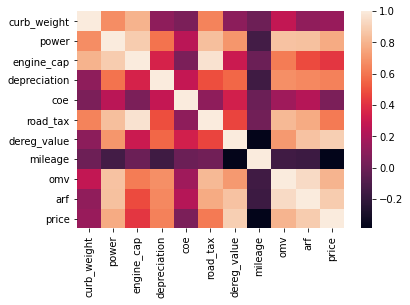

In [63]:
# curb_weight and coe having low correlation
cont_vars_with_target = cont_vars + ["price"]
corr = df[cont_vars_with_target].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

/Users/user/.pyenv/versions/anaconda3-5.2.0/envs/py37/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


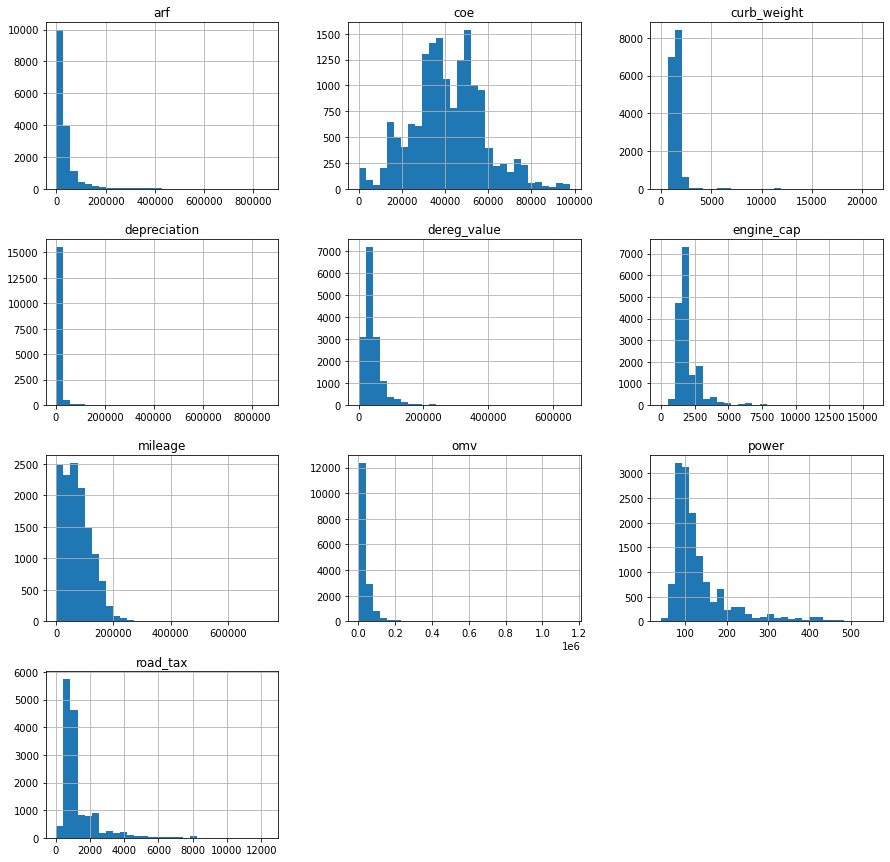

In [39]:
df[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

In [44]:
skewed = ['curb_weight', 'depreciation', 'omv']
cont_vars = ['power', 'engine_cap', 'coe', 'road_tax', 'dereg_value', 'mileage','arf']

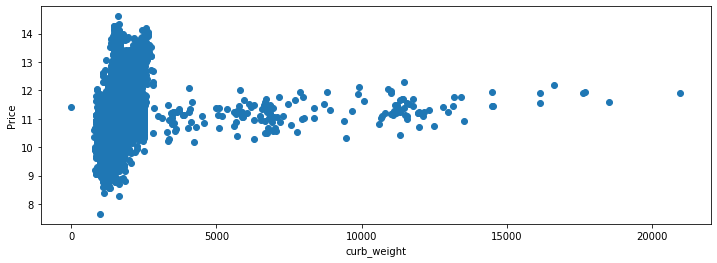

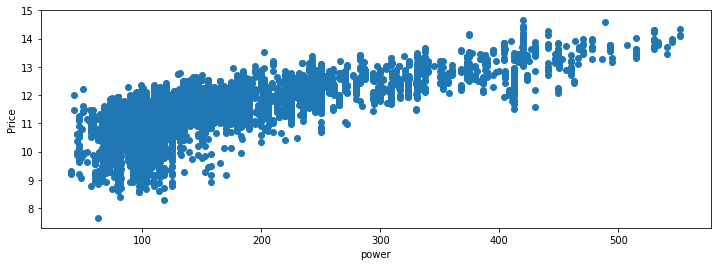

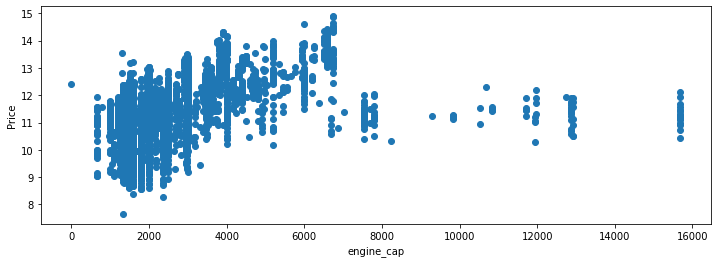

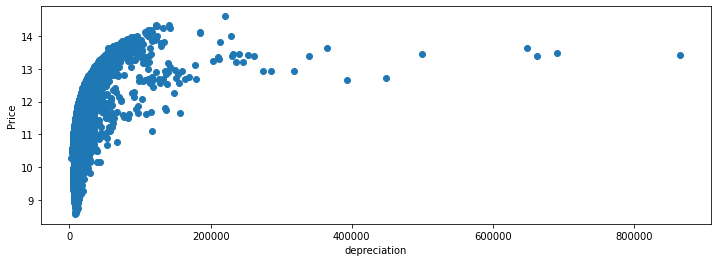

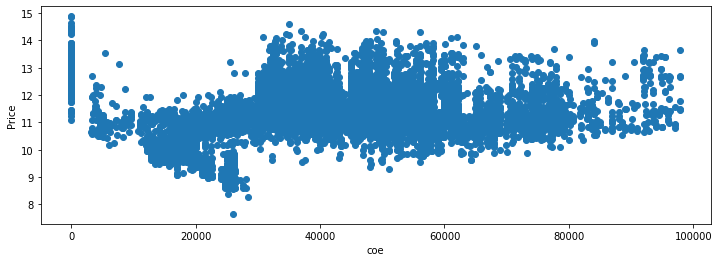

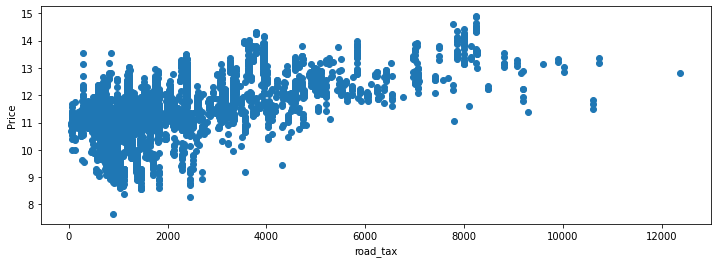

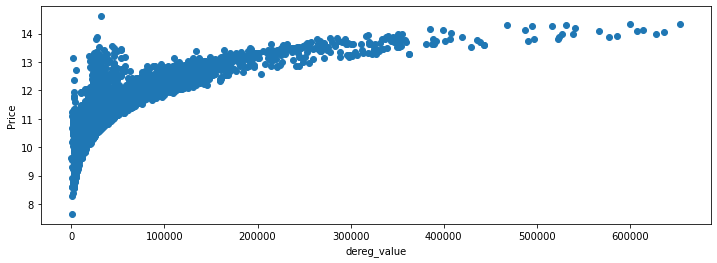

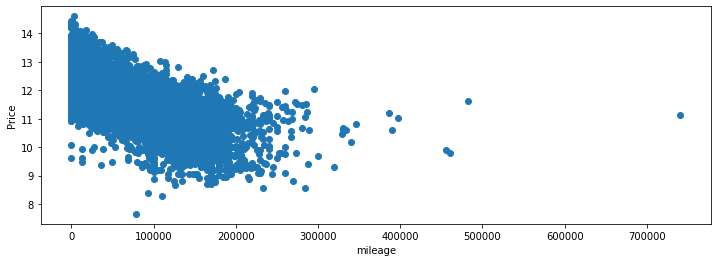

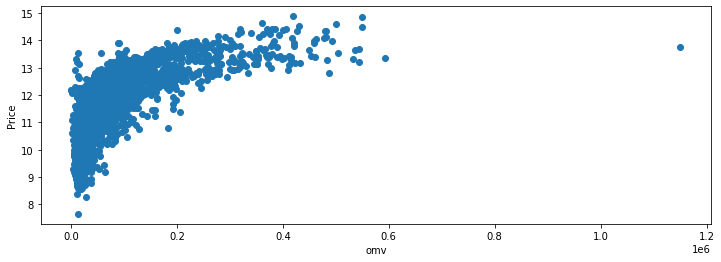

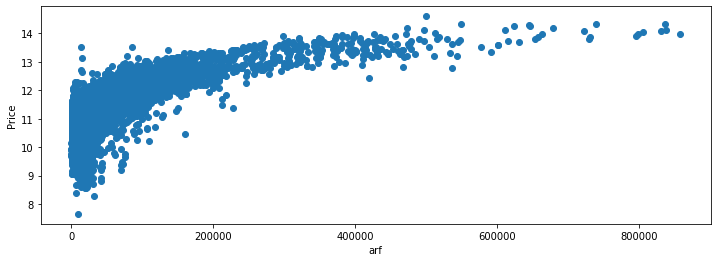

In [64]:
for var in cont_vars: 
    plt.figure(figsize=(12,4))  
    plt.scatter(df[var], np.log(df[target]))
    plt.ylabel('Price')
    plt.xlabel(var)
    plt.show()

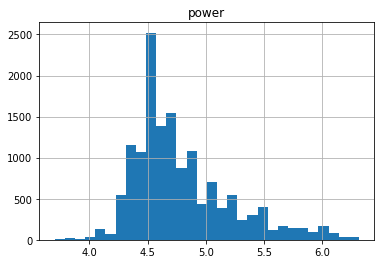

In [51]:
tmp = df.copy()

for var in ["power"]:

    # transform the variable with logarithm
    tmp[var] = np.log(df[var])
    
tmp[["power"]].hist(bins=30)
plt.show()

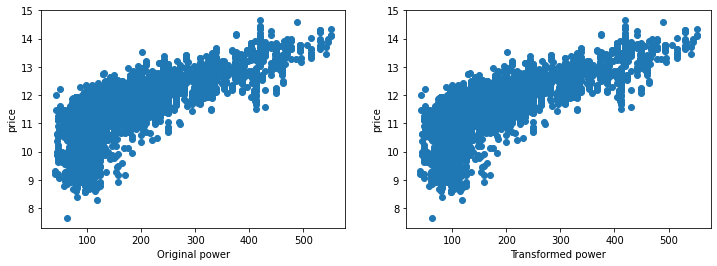

In [52]:
for var in ["power"]:
    
    plt.figure(figsize=(12,4))
    
    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(df[var], np.log(df[target]))
    plt.ylabel(target)
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(df[var], np.log(df[target]))
    plt.ylabel(target)
    plt.xlabel('Transformed ' + var)
                
    plt.show()

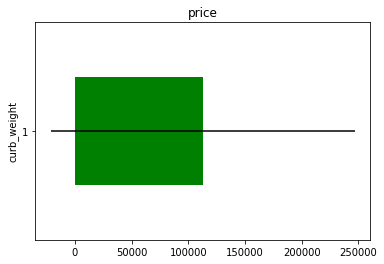

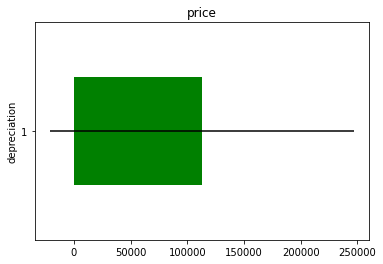

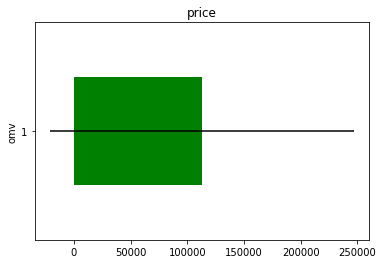

In [53]:
for var in skewed:
    
    tmp = df.copy()
    
    # map the variable values into 0 and 1
    tmp[var] = np.where(df[var]==0, 0, 1)
    
    # determine mean sale price in the mapped values
    tmp = tmp.groupby(var)[target].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title=target, color='green')

    plt.show()

# Categorical variables

In [65]:
df[cat_vars].head()

,title,make,model,description,type_of_vehicle,category,transmission,fuel_type,opc_scheme,eco_category,features,accessories,listing_id
0,BMW 3 Series 320i Gran Turismo M-Sport,bmw,320i,1 owner! 320i gt m-sports model! big brake kit...,luxury sedan,"parf car, premium ad car, low mileage car",auto,NaN,NaN,uncategorized,"5 doors gt, powerful and fuel efficient 2.0l t...","bmw i-drive, navigation, bluetooth/aux/usb inp...",1030324
1,Toyota Hiace 3.0M,NaN,hiace,high loan available! low mileage unit. wear an...,van,premium ad car,manual,diesel,NaN,uncategorized,low mileage unit. well maintained vehicle. vie...,factory radio setting. front recording camera....,1021510
2,Mercedes-Benz CLA-Class CLA180,mercedes-benz,cla180,1 owner c&c unit. full agent service with 1 mo...,luxury sedan,"parf car, premium ad car",auto,NaN,NaN,uncategorized,responsive and fuel efficient 1.6l inline 4 cy...,dual electric/memory seats. factory fitted aud...,1026909
3,Mercedes-Benz E-Class E180 Avantgarde,mercedes-benz,e180,"fully agent maintained, 3 years warranty 10 ye...",luxury sedan,"parf car, almost new car, consignment car",auto,NaN,NaN,uncategorized,"1.5l inline-4 twin scroll turbocharged engine,...",64 colour ambient lighting. active parking ass...,1019371
4,Honda Civic 1.6A VTi,NaN,civic,"kah motor unit! 1 owner, lowest 1.98% for full...",mid-sized sedan,parf car,auto,NaN,NaN,uncategorized,"1.6l i-vtec engine, 123 bhp, earth dreams cvt ...","s/rims, premium leather seats, factory touch s...",1031014


<AxesSubplot:>

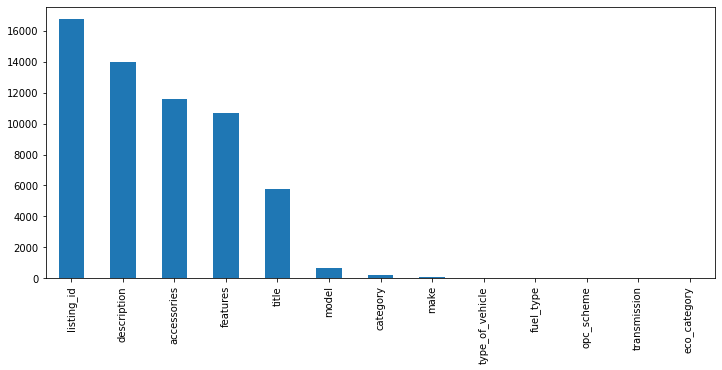

In [66]:
# listing_id is not useful but just an identifier
# description, accessories, features require some text cleaning
# eco_category can be dropped
df[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [68]:
df[cat_vars].isnull().mean().sort_values(ascending=False)

opc_scheme         0.987667
fuel_type          0.792064
accessories        0.167600
make               0.128694
features           0.027347
description        0.020555
listing_id         0.000000
eco_category       0.000000
transmission       0.000000
category           0.000000
type_of_vehicle    0.000000
model              0.000000
title              0.000000
dtype: float64

In [80]:
for var in ["opc_scheme", "fuel_type", "accessories", "make", "features", "description"]:
    df[var] = df[var].fillna("Missing")

In [67]:
df[cat_vars].nunique().sort_values(ascending=False)

listing_id         16728
description        14006
accessories        11565
features           10687
title               5775
model                692
category             193
make                  77
type_of_vehicle       11
fuel_type              4
opc_scheme             3
transmission           2
eco_category           1
dtype: int64

In [75]:
low_card_cat_vars = ['type_of_vehicle', 'fuel_type', 'transmission', 'opc_scheme']

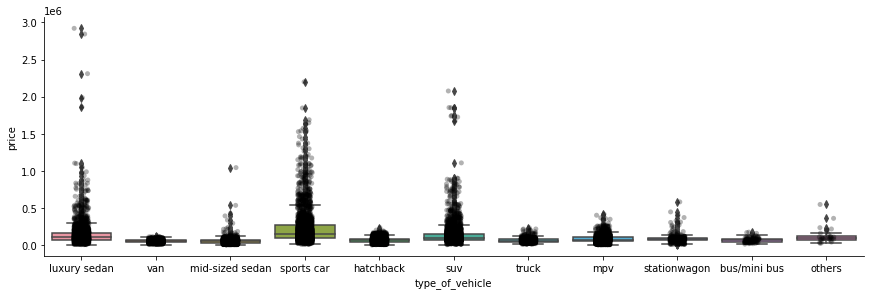

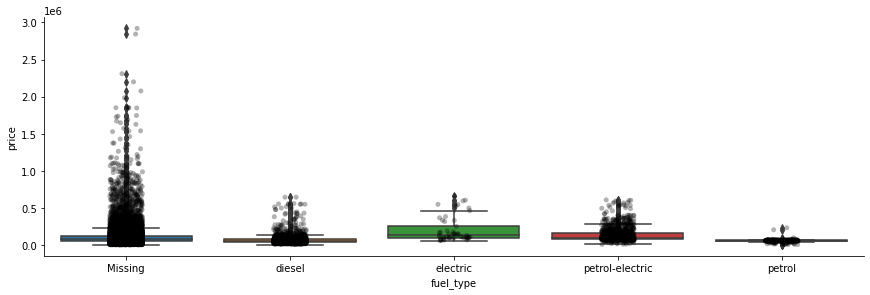

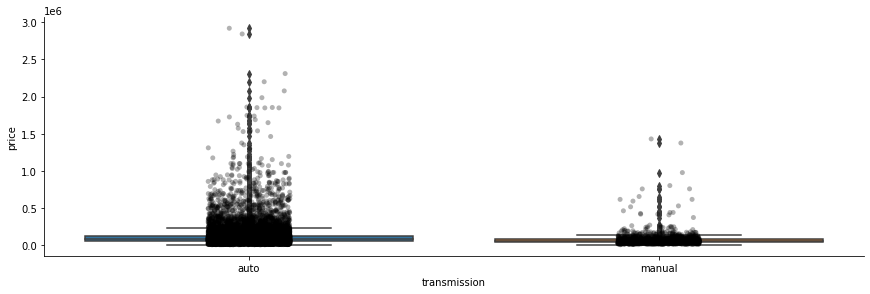

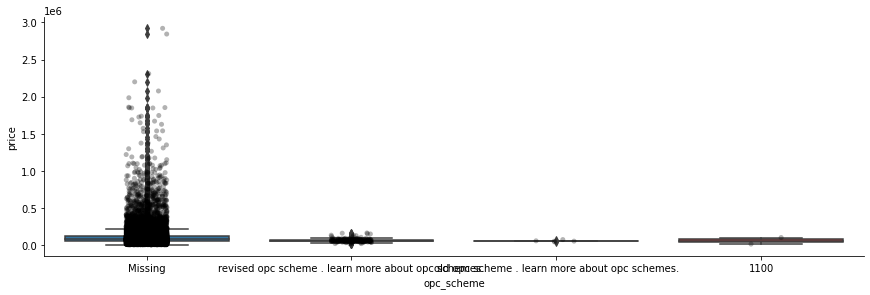

In [82]:
# opc_scheme can possibly be dropped
for var in low_card_cat_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y=target, data=df, kind="box", height=4, aspect=3)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y=target, data=df, jitter=0.1, alpha=0.3, color='k')
    plt.show()

In [91]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)[target].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations

for var in low_card_cat_vars + ["category", "make"]:
    print(analyse_rare_labels(df, var, 0.01))
    print()

type_of_vehicle
bus/mini bus    0.006375
others          0.001668
Name: price, dtype: float64

fuel_type
electric    0.003158
Name: price, dtype: float64

Series([], Name: price, dtype: float64)

opc_scheme
1100                                              0.000119
old opc scheme . learn more about opc schemes.    0.000298
Name: price, dtype: float64

category
almost new car                                                0.004349
almost new car, electric cars                                 0.000417
almost new car, low mileage car                               0.001907
almost new car, premium ad car, electric cars                 0.000179
almost new car, premium ad car, low mileage car               0.001728
                                                                ...   
parf car, rare & exotic, premium ad car, sta evaluated car    0.000060
parf car, sta evaluated car                                   0.001668
parf car, sta evaluated car, hybrid cars                      0.00017

In [96]:
df['type_of_vehicle']

0           luxury sedan
1                    van
2           luxury sedan
3           luxury sedan
4        mid-sized sedan
              ...       
16779                suv
16780          hatchback
16781         sports car
16782          hatchback
16783         sports car
Name: type_of_vehicle, Length: 16784, dtype: object

# To-Do
- columns can be dropped: indicative_price, eco_category, opc_scheme
- text cleaning required on columns: description, accessories, features, title, category      